<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/ARIMA_LSTM_BAGGING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

In [ ]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()
data1.head(10)

In [ ]:
data1_arima = data1[0:25]
data1_arima

In [ ]:
data1_lstm = data1[25:]
data1_lstm

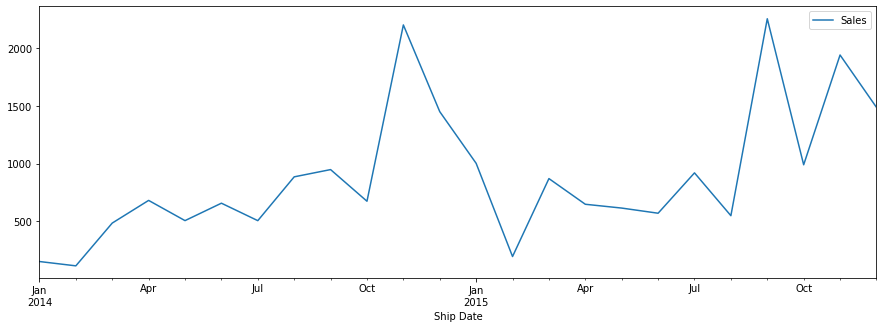

In [7]:
data1_arima.plot(figsize=(15,5))
plt.show()

In [8]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [9]:
seasons = 12
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] 
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [10]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(data1, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


maxlag should be < nobs
maxlag should be < nobs
**** Smallest PDQ,SPDQ is *****
343.9431159320116
(1, 1, 1)
(1, 1, 0, 12)


In [11]:
model = sm.tsa.statespace.SARIMAX(data1, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
results = model.fit()

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -167.972
Date:                            Fri, 10 Jun 2022   AIC                            343.943
Time:                                    01:23:25   BIC                            348.485
Sample:                                01-01-2014   HQIC                           345.085
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4102      0.277     -1.482      0.138      -0.953       0.132
ma.L1         -0.9987     11.014     -0.091      0.928     -22.585      20.587
ar.S.L12      -0.6179      0.207     -2.985      0.003      -1.024      -0.212
sigma2      1.171e+05   1.28e+06      0.092      0.927   -2.38e+06    2.62e+06
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 5.91
Prob(Q):                               nan   Prob(JB):                         0.05
Heteroskedasticity (H):               3.58   Skew:                             1.04
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

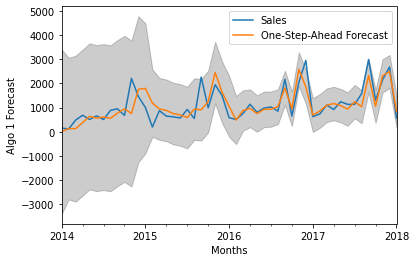

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data1['2014':].plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()

In [ ]:
data1_lstm = data1_lstm.reset_index()
data1_lstm.rename(columns={'Ship Date':'date','Sales':'sales'},inplace=True)
data1_lstm

In [54]:
df_diff = data1_lstm.copy()
df_diff['prev_sales'] = df_diff['sales'].shift(1)
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['sales'] - df_diff['prev_sales'])
df_diff.head(10)

,date,sales,prev_sales,diff
1,2016-03-01,751.8245,506.8740,244.9505
2,2016-04-01,1136.4660,751.8245,384.6415
3,2016-05-01,799.5910,1136.4660,-336.8750
4,2016-06-01,977.0170,799.5910,177.4260
5,2016-07-01,1023.4360,977.0170,46.4190
6,2016-08-01,850.5760,1023.4360,-172.8600
7,2016-09-01,2167.9380,850.5760,1317.3620
8,2016-10-01,647.6560,2167.9380,-1520.2820
9,2016-11-01,2041.7155,647.6560,1394.0595
10,2016-12-01,2945.7910,2041.7155,904.0755


In [55]:
len(df_diff)

23

In [56]:
df_supervised = df_diff.drop(['prev_sales'],axis=1)

In [57]:
len(df_supervised)

23

In [ ]:
df_supervised

In [59]:
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
df_supervised = df_supervised.dropna().reset_index(drop=True)

In [60]:
len(df_supervised)

11

In [61]:
df_supervised

,date,sales,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2017-03-01,1102.429,367.851,111.3675,-2322.5805,904.0755,1394.0595,-1520.2820,1317.3620,-172.8600,46.4190,177.4260,-336.8750,384.6415,244.9505
1,2017-04-01,918.103,-184.326,367.8510,111.3675,-2322.5805,904.0755,1394.0595,-1520.2820,1317.3620,-172.8600,46.4190,177.4260,-336.8750,384.6415
2,2017-05-01,1240.598,322.495,-184.3260,367.8510,111.3675,-2322.5805,904.0755,1394.0595,-1520.2820,1317.3620,-172.8600,46.4190,177.4260,-336.8750
3,2017-06-01,1129.038,-111.560,322.4950,-184.3260,367.8510,111.3675,-2322.5805,904.0755,1394.0595,-1520.2820,1317.3620,-172.8600,46.4190,177.4260
4,2017-07-01,1130.699,1.661,-111.5600,322.4950,-184.3260,367.8510,111.3675,-2322.5805,904.0755,1394.0595,-1520.2820,1317.3620,-172.8600,46.4190
5,2017-08-01,1571.210,440.511,1.6610,-111.5600,322.4950,-184.3260,367.8510,111.3675,-2322.5805,904.0755,1394.0595,-1520.2820,1317.3620,-172.8600
6,2017-09-01,2983.626,1412.416,440.5110,1.6610,-111.5600,322.4950,-184.3260,367.8510,111.3675,-2322.5805,904.0755,1394.0595,-1520.2820,1317.3620
7,2017-10-01,1303.404,-1680.222,1412.4160,440.5110,1.6610,-111.5600,322.4950,-184.3260,367.8510,111.3675,-2322.5805,904.0755,1394.0595,-1520.2820
8,2017-11-01,2140.243,836.839,-1680.2220,1412.4160,440.5110,1.6610,-111.5600,322.4950,-184.3260,367.8510,111.3675,-2322.5805,904.0755,1394.0595
9,2017-12-01,2674.672,534.429,836.8390,-1680.2220,1412.4160,440.5110,1.6610,-111.5600,322.4950,-184.3260,367.8510,111.3675,-2322.5805,904.0755


In [21]:
df_model = df_supervised.drop(['date','sales'],axis=1)

In [22]:
train_set = df_model.values

In [23]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)

In [25]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [26]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
11/11 [==============================] - 5s 2ms/step - loss: 0.3814
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3821
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3654
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3504
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3367
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3243
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3129
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3024
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2927
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2672
Epoch 13/100
11/11 [=================

In [27]:
y_pred = model.predict(X_train,batch_size=1)
y_pred

array([[ 0.2706074 ],
       [ 0.07787378],
       [ 0.41759384],
       [ 0.25019857],
       [ 0.19486848],
       [ 0.46525863],
       [ 0.8342152 ],
       [-0.7944789 ],
       [ 0.5327193 ],
       [ 0.657458  ],
       [-0.7972417 ]], dtype=float32)

In [28]:
from sklearn import metrics
metrics.mean_absolute_error(y_train,y_pred)

0.0932759084867655

In [37]:
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
pred_test_set = []
for index in range(0,len(y_train)):
    print(np.concatenate([y_pred[index],X_train[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_train[index]],axis=1))
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[ 0.27060741  0.15861572 -1.          0.727796    0.99017054 -0.56826677
   0.95872751  0.15680857  0.27480708  0.34530463  0.06854874  0.45681153
   0.38164094]]
[[ 0.07787378  0.32448285  0.3033201  -1.          0.727796    1.
  -0.56826677  0.95872751  0.15680857  0.27480708  0.34530463  0.06854874
   0.45681153]]
[[ 0.41759384 -0.03260841  0.44066079  0.3033201  -1.          0.73632959
   1.         -0.56826677  0.95872751  0.15680857  0.27480708  0.34530463
   0.06854874]]
[[ 0.25019857  0.29515126  0.1449834   0.44066079  0.3033201  -1.
   0.73632959  1.         -0.56826677  0.95872751  0.15680857  0.27480708
   0.34530463]]
[[ 0.19486848  0.01444915  0.41637375  0.1449834   0.44066079  0.3097572
  -1.          0.73632959  1.         -0.56826677  0.95872751  0.15680857
   0.27480708]]
[[ 0.46525863  0.08766884  0.18394783  0.41637375  0.1449834   0.44777622
   0.3097572  -1.          0.73632959  1.         -0.56826677  0.95872751
   0.15680857]]
[[ 0.83421522  0.37147186  0.2445

In [38]:
result_list = []
sales_dates = list(data1_lstm.date)
act_sales = list(data1_lstm.sales)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)

In [39]:
df_result

,pred_value,date
0,636,2016-03-01
1,542,2016-04-01
2,1524,2016-05-01
3,893,2016-06-01
4,973,2016-07-01
5,1495,2016-08-01
6,1971,2016-09-01
7,424,2016-10-01
8,1238,2016-11-01
9,2851,2016-12-01


In [33]:
data2 = data1_lstm.copy()
df_re = df_result.copy()
data2  = data2.set_index('date')
df_re = df_re.set_index('date')

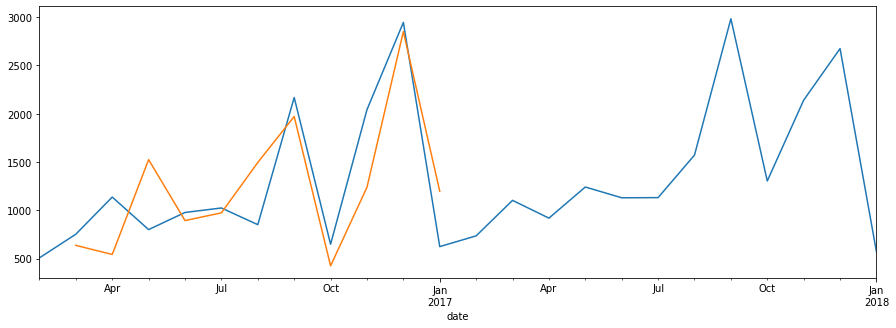

In [34]:
import matplotlib.pyplot as plt
data2['sales'].plot(figsize=(15,5))
df_re['pred_value'].plot()
plt.show()

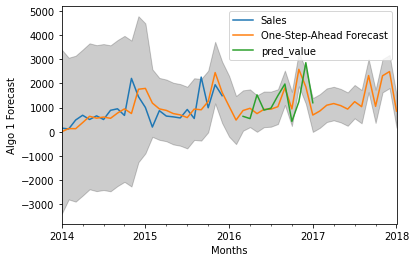

In [36]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data1_arima['2014':].plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
df_re['pred_value'].plot()
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()